In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
ye_sl=pd.read_csv('Salary_Data.csv')
ye_sl.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
ye_sl=ye_sl.rename(columns={'YearsExperience':'ye','Salary':'sl'})

In [4]:
print(ye_sl)

      ye        sl
0    1.1   39343.0
1    1.3   46205.0
2    1.5   37731.0
3    2.0   43525.0
4    2.2   39891.0
5    2.9   56642.0
6    3.0   60150.0
7    3.2   54445.0
8    3.2   64445.0
9    3.7   57189.0
10   3.9   63218.0
11   4.0   55794.0
12   4.0   56957.0
13   4.1   57081.0
14   4.5   61111.0
15   4.9   67938.0
16   5.1   66029.0
17   5.3   83088.0
18   5.9   81363.0
19   6.0   93940.0
20   6.8   91738.0
21   7.1   98273.0
22   7.9  101302.0
23   8.2  113812.0
24   8.7  109431.0
25   9.0  105582.0
26   9.5  116969.0
27   9.6  112635.0
28  10.3  122391.0
29  10.5  121872.0


In [5]:
ye_sl.corr()

,ye,sl
ye,1.000000,0.978242
sl,0.978242,1.000000


In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Text(0, 0.5, 'Salary')

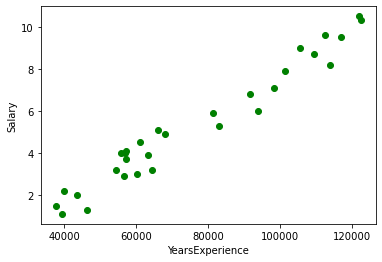

In [7]:
plt.scatter(x=ye_sl.sl, y=ye_sl.ye, color='green')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

{'whiskers': [<matplotlib.lines.Line2D at 0x2860489cee0>,
 'caps': [<matplotlib.lines.Line2D at 0x286048ab5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2860489cb80>],
 'medians': [<matplotlib.lines.Line2D at 0x286048abca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x286048b7040>],
 'means': []}

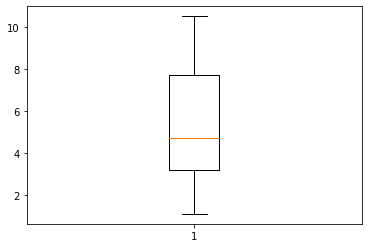

In [8]:
plt.boxplot(ye_sl.ye)

(array([6., 9., 5., 4., 6.]),
 array([ 1.1 ,  2.98,  4.86,  6.74,  8.62, 10.5 ]),
 <BarContainer object of 5 artists>)

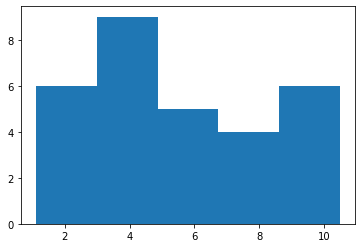

In [9]:
plt.hist(ye_sl.ye, bins=5)

In [10]:
model2=smf.ols("ye~sl",data=ye_sl).fit()

In [11]:
model2.params

Intercept   -2.383161
sl           0.000101
dtype: float64

In [12]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ye   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        22:16:58   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
sl             0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model3=smf.ols("ye~np.log(sl)",data=ye_sl).fit()

In [15]:
model3.params

Intercept    -77.696132
np.log(sl)     7.428821
dtype: float64

In [16]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ye   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           7.03e-18
Time:                        22:18:11   Log-Likelihood:                -33.035
No. Observations:                  30   AIC:                             70.07
Df Residuals:                      28   BIC:                             72.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -77.6961      4.241    -18.322      0.000     -86.383     -69.009
np.log(sl)     7.4288      0.379     19.585      0.000       6.652       8.206
==============================================================================
Omnibus:                        1.748   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.213
Skew:                          -0.227   Prob(JB):                        0.545
Kurtosis:                       2.126   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model2.conf_int(0.05)

,0,1
Intercept,-3.053603,-1.712718
sl,0.000093,0.000110


In [18]:
model3.conf_int(0.05)

,0,1
Intercept,-86.382786,-69.009477
np.log(sl),6.651830,8.205813


In [19]:
pred2 = model2.predict(ye_sl)

In [20]:
pred3 = model3.predict(ye_sl)

Text(0, 0.5, 'YearsExperience')

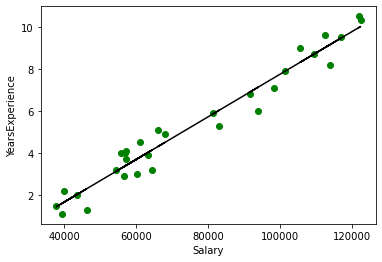

In [21]:
plt.scatter(x=ye_sl.sl, y=ye_sl.ye, color='green')
plt.plot(ye_sl.sl, pred2,color='black')
plt.xlabel("Salary")
plt.ylabel("YearsExperience")

Text(0, 0.5, 'YearsExperience')

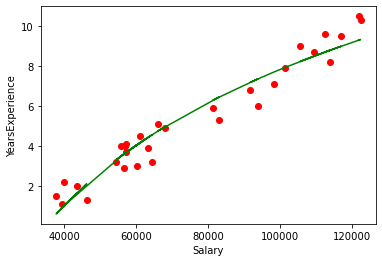

In [23]:
plt.scatter(x=ye_sl.sl, y=ye_sl.ye, color='red')
plt.plot(ye_sl.sl, pred3,color='green')
plt.xlabel("Salary")
plt.ylabel("YearsExperience")